In [14]:
from joommf.sim import Sim
from joommf.mesh import Mesh
from joommf.energies.exchange import Exchange
from joommf.energies.demag import Demag
from joommf.energies.zeeman import Zeeman
from joommf.drivers import evolver

import matplotlib.pyplot as plt
%matplotlib inline

# Mesh specification.
lx = ly = lz = 50e-9  # x, y, and z dimensions (m)
dx = dy = dz = 5e-9  # x, y, and z cell dimensions (m)

Ms = 8e5  # saturation magnetisation (A/m)
A = 1e-11  # exchange energy constant (J/m)
H = (1e3, 0, 0)  # external magnetic field (A/m)
m_init = (0, 0, 1)  # initial magnetisation
t_sim = 1e-9  # simulation time (s)
gamma = 2.21e5
alpha = 0.1
# Create a mesh.
mesh = Mesh((lx, ly, lz), (dx, dy, dz))

# Create a simulation object.
sim = Sim(mesh, Ms, name='dynamics_example', debug=True)

# Add energies.
sim.add_energy(Exchange(A))
sim.add_energy(Demag())
sim.add_energy(Zeeman(H))
sim.set_evolver(
    evolver.LLG(t_sim, m_init, Ms, alpha, gamma, name='evolver'))
# Set initial magnetisation.
sim.set_m(m_init)

# Run simulation.
sim.run()

DEBUG: This simulation name already exists.
About to execute: '/Users/ryan/oommf/oommf/oommf.tcl boxsi dynamics_example7.mif'
Running simulation... This may take a while
Simulation complete
JOOMMF DEBUG MODE
Oommf Stderr:




Oommf Stdout:
Start: "/Users/ryan/oommf-python/joommf/dynamics_example7.mif"
Options: -threads 2
Boxsi version 1.2.0.6
Running on: ryans-macbook-air.local
OS/machine: Darwin/x86_64
User: ryan	PID: 14338
Number of threads: 2
Mesh geometry: 10 x 10 x 10 = 1 000 cells
Boxsi run end.

Loading simulation scalar output from dynamics_example7.odt


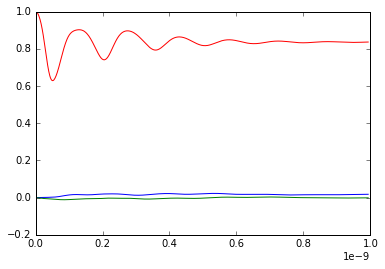

In [15]:
mx = sim.scalar_output.dataframe['TimeDriver::mx']
my = sim.scalar_output.dataframe['TimeDriver::my']
mz = sim.scalar_output.dataframe['TimeDriver::mz']
t = sim.scalar_output.dataframe['TimeDriver::Simulation time']
plt.plot(t, mx)
plt.plot(t, my)
plt.plot(t, mz)
